# AFRICA COVID19 ANALYSIS

<a id='top'></a>
* [General Cases](#general) <br>
* [Cases by Region](#by_region) <br>
* [Recovery Rate](#recovery)  <br>
* [Mortality Rate](#mortality) <br>
* [Radndom Selection](#select_few) <br>
* [Top Ten New Cases by Country](#top_six) <br>

In [73]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import os
import datetime
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
#SELECT  MOST RECENT DAILY CASES FILE NAME FOR AFRICAN REGIONS
def most_recent_new_cases(path):
    next_mostrecent_CSV ={}
    files = os.listdir(path)
    new_casesCSV_files = [file for file in files if file[-3:] == 'csv' and file[-20:-12] == 'NewCases']
    date_conversion = [datetime.datetime.strptime(date_slice[-12:-4], '%d%m%Y') for date_slice in new_casesCSV_files]
    current_date = datetime.datetime.now().strftime("%d%m%Y")
    current_date_conversion = datetime.datetime.strptime(current_date,'%d%m%Y')
    for given_date in date_conversion:
        datetime_string= given_date.strftime('%d')+given_date.strftime('%m')+given_date.strftime('%Y')
        particular_date = [datee  for datee in new_casesCSV_files if datee[-12:-4] == datetime_string]
        timediff_seconds = current_date_conversion - given_date
        next_mostrecent_CSV[particular_date[0]] = timediff_seconds.total_seconds()
        sorted_next_mostrecent_CSV = sorted(next_mostrecent_CSV.items(), key=lambda kv: kv[1])
    return sorted_next_mostrecent_CSV[0][0]

In [75]:
ea_latest = most_recent_new_cases("..\COVID19\Africa\EastAfrica")
wa_latest = most_recent_new_cases("..\COVID19\Africa\WestAfrica")
na_latest = most_recent_new_cases("..\COVID19\Africa\\NorthAfrica")
sa_latest = most_recent_new_cases("..\COVID19\Africa\SouthernAfrica")
ca_latest = most_recent_new_cases("..\COVID19\Africa\CentralAfrica")
wa_latest

'WestAfricaNewCases09102020.csv'

## Loading the files...

In [76]:
east_africa= pd.read_csv('../COVID19/Africa/EastAfrica/'+ ea_latest, dtype=object, encoding='utf-8')
west_africa = pd.read_csv('../COVID19/Africa/WestAfrica/'+wa_latest, dtype=object, encoding='utf-8')
north_africa = pd.read_csv('../COVID19/Africa/NorthAfrica/'+na_latest,dtype=object,  encoding='utf-8')
southern_africa= pd.read_csv('../COVID19/Africa/SouthernAfrica/'+sa_latest, dtype=object, encoding='utf-8')
central_africa = pd.read_csv('../COVID19/Africa/CentralAfrica/'+ca_latest, dtype=object, encoding='utf-8')

In [77]:
west_africa.head()

,Country_Other,April16,April17,April18,April19,April20,April21,April22,April23,April24,...,September30,October01,October02,October03,October04,October05,October06,October07,October08,October09
0,Ivory Coast,0,+34,+113,+46,+32,+37,+36,+52,+73,...,+55,+31,+38,+56,+33,+3,+18,+32,+47,+54
1,Ghana,0,0,+193,+208,0,0,+112,0,+125,...,+144,+30,+38,+109,+26,0,0,0,+118,+40
2,Niger,0,+43,+12,+9,0,+9,+5,+9,+10,...,+1,0,+1,+2,0,0,0,0,+1,0
3,Burkina Faso,+4,+11,+8,+11,+5,+19,+9,+7,+13,...,+24,+32,+35,+31,+13,+17,+13,+25,+19,+13
4,Nigeria,+35,+51,+49,+85,+38,+117,+91,+108,+114,...,+201,+153,+126,+160,+58,+120,+118,+155,+103,+151


## SUMMARY FOR AFRICA

In [78]:
african_summary =  pd.read_csv('../COVID19/World/WorldSummary/Africa/Africa_summary.csv', encoding='utf-8')
african_summary.tail()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical
172,October05,1527905,4977,36697,128,1268405,222803,1638
173,October06,1534494,6589,36885,188,1275086,222523,1607
174,October07,1545109,10615,37154,269,1286083,221872,1569
175,October08,1556017,10770,37452,303,1292200,226365,1617
176,October09,1564774,8757,37689,237,1299430,227655,1640


In [79]:
d = datetime.datetime.strptime(ea_latest[18:26], '%d%m%Y')
date_string = d.strftime('%B') + ' ' +d.strftime('%d') + ', '+ d.strftime('%Y')
date_string 

'October 09, 2020'

In [80]:
dates = east_africa.columns.to_list()
dates = dates[1:]

<a id='general'></a>

In [81]:
fig = go.Figure()
for column in african_summary.columns[1:]:
    fig.add_trace(go.Scatter(
        x=dates,
        y= african_summary[column].tolist(),
        name=column,
        mode='lines',
        line=dict(width=3)       
))    
fig.update_layout(
    title={
        'text': '<b>'+'COVID19 CASES IN AFRICA: ' + date_string +'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(title='<b>Date</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD'),nticks=30),
    yaxis=dict(title='<b>Cases</b>',titlefont_size=18,  titlefont=dict(color='#4D4B4B')),
    legend=dict(x=0.07, y=0.98,traceorder="normal",bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)',),
#     margin=dict(l=20, r=20, t=20, b=20),    
    xaxis_tickangle=90,   
#     legend=dict(x=0.01, y=0.98,traceorder="normal",borderwidth=1,bordercolor="Black",)
)
fig.show()

[Return to top](#top)

### NEW CASES BY REGION

In [82]:
fig = go.Figure()

total_per_day1 = []
for date in dates:    
    total = east_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day1.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day1,
    name ="East Africa",
    mode='lines',
    line=dict(width=3)
    
))

total_per_day2 = []
for date in dates:    
    total = west_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day2.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day2,
    name ="West Africa",
    mode='lines',
    line=dict(width=3)
   
))


total_per_day3 = []
for date in dates:    
    total = north_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day3.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day3,
    name ="North Africa",
    mode='lines',
    line=dict(width=3)
    
))

total_per_day4 = []
for date in dates:    
    total = southern_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day4.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day4,
    name ="Southern Africa",
    mode='lines',
    line=dict(width=3)
    
))

total_per_day5 = []
for date in dates:    
    total = central_africa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
    total_per_day5.append(total)

fig.add_trace(go.Scatter(
x=dates,
y =total_per_day5,
    name ="Central Africa",
    mode='lines',
    line=dict(width=3)
    
))

fig.update_layout(
    title={
        'text': '<b>'+'AFRICA- COVID19 NEW CASES: ' + date_string +'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(title='<b>Date</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD'),nticks=8),
    yaxis=dict(title='<b>New Cases</b>',titlefont_size=18,  titlefont=dict(color='#4D4B4B')),
    xaxis_tickangle=90,
    legend=dict(x=0.05, y=0.98,traceorder="normal",borderwidth=1,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)',)
)

   
fig.show()

[Return to top](#top)

In [83]:
given_date =ea_latest[18:26]
countries_new_cases = pd.read_csv("../COVID19/World/NewCases/DailyCases"+given_date+".csv")
countries_new_cases.head(3)

,Country_Other,April16,April17,April18,April19,April20,April21,April22,April23,April24,...,September30,October01,October02,October03,October04,October05,October06,October07,October08,October09
0,China,+46,+325,+27,+16,+12,+11,+30,+10,+6,...,+19,+11,+10,+10,+16,+20,+12,+7,+11,+21
1,USA,"+29,567","+32,165","+29,057","+25,844","+28,123","+25,985","+29,973","+31,900","+38,958",...,"+40,929","+47,389","+51,403","+48,925","+34,066","+41,576","+43,660","+48,715","+56,652","+60,558"
2,Spain,"+4,289","+5,891","+3,577","+4,258","+1,536","+3,968","+4,211","+4,635","+6,740",...,"+11,016","+3,715","+3,722",NaN,NaN,"+2,099","+12,793","+6,645","+5,585","+5,986"


In [84]:
countries_and_continents = pd.read_csv('../COVID19/GeneralFiles/CountriesAndContinents.csv')
african_countries = countries_and_continents[countries_and_continents['continent'] == 'Africa']

In [85]:
african_regions = list(african_countries['region'].unique())
african_regions

['North Africa',
 'South Africa',
 'Central Africa',
 'East Africa',
 'West Africa']

In [86]:
west_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'West Africa')]
east_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'East Africa')]
central_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'Central Africa')]
southern_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'South Africa')]
north_africa = countries_and_continents[(countries_and_continents['continent'] == 'Africa') & (countries_and_continents['region'] == 'North Africa')]
southern_africa

,country_Other,continent,region
50,South Africa,Africa,South Africa
170,Zimbabwe,Africa,South Africa
179,Eswatini,Africa,South Africa
181,Namibia,Africa,South Africa
182,Botswana,Africa,South Africa
214,Lesotho,Africa,South Africa


In [87]:
north_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(north_africa['country_Other'])]
north_africa_new_cases = north_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
north_africa_new_cases.fillna(0, inplace=True)
north_africa_new_cases.reset_index(drop=True)

east_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(east_africa['country_Other'])]
east_africa_new_cases = east_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
east_africa_new_cases.fillna(0, inplace=True)
east_africa_new_cases.reset_index(drop=True)

central_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(central_africa['country_Other'])]
central_africa_new_cases = central_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
central_africa_new_cases.fillna(0, inplace=True)
central_africa_new_cases.reset_index(drop=True)

southern_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(southern_africa['country_Other'])]
southern_africa_new_cases = southern_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
southern_africa_new_cases.fillna(0, inplace=True)
southern_africa_new_cases.reset_index(drop=True)

west_africa_new_cases = countries_new_cases[countries_new_cases['Country_Other'].isin(west_africa['country_Other'])]
west_africa_new_cases = west_africa_new_cases.iloc[:, [0] + list(range(-6, 0))]
west_africa_new_cases.fillna(0, inplace=True)
west_africa_new_cases.reset_index(drop=True)

southern_africa_new_cases

,Country_Other,October04,October05,October06,October07,October08,October09
52,South Africa,"+1,573",+926,"+1,027","+1,913","+1,736","+1,461"
169,Zimbabwe,+3,+10,+17,+4,+32,+43
177,Eswatini,+39,+10,+19,+19,+15,+12
180,Namibia,+54,+28,+19,+41,+67,+48
181,Botswana,0,0,0,0,+47,0
214,Lesotho,+3,0,0,+84,+19,+14


In [88]:
countries_new_cases =  countries_new_cases.iloc[:, [0] + list(range(-6, 0))]

<a id='by_region'></a>

In [89]:
fig = make_subplots(rows=3, cols=2,  specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}],
                                            [{'type':'domain'}, {'type':'domain'}]], print_grid=False,vertical_spacing=0.005,
                                            horizontal_spacing=0.085)
position = 0

x=[0.168, 0.82, 0.168, 0.82, 0.168, 0.82]
y=[0.84,0.84, 0.5,0.5,0.155, 0.155]

# x=[0.2, 0.8, 0.2, 0.8, 0.2, 0.8]
# y=[0.85,0.85, 0.5,0.5,0.15, 0.15]

# x=[0.18, 0.82, 0.18, 0.82, 0.18, 0.82]
# y=[0.85,0.85, 0.5,0.5,0.15, 0.15]
slice_colors =  ['crimson', 'green', 'saddlebrown', 'yellow', 'blue']

for column in countries_new_cases.columns[1:][::-1]:
    afrik_region = []
    afric_region_stat = []
    row = ((position//2)+1)
    col = ((position%2)+1)
    for region in african_regions: 
        if(region == 'North Africa'):        
            north_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(north_africa_new_cases['Country_Other'])]
            north_africa_total=north_africa_total.copy()
            north_africa_total.fillna(0, inplace=True)
            north_africa_sum = north_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()  
            afrik_region.append(region)
            afric_region_stat.append(north_africa_sum)

        elif(region == 'South Africa'):
            southern_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(southern_africa_new_cases['Country_Other'])]
            southern_africa_total=southern_africa_total.copy()
            southern_africa_total.fillna(0, inplace=True)
            southern_africa_sum = southern_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum() 
            afrik_region.append(region)
            afric_region_stat.append(southern_africa_sum)

        elif(region == 'Central Africa'):
            central_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(central_africa_new_cases['Country_Other'])]
            central_africa_total=central_africa_total.copy()
            central_africa_total.fillna(0, inplace=True)
            central_africa_sum = central_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
            afrik_region.append(region)
            afric_region_stat.append(central_africa_sum)

        elif(region == 'East Africa'):     
            east_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(east_africa_new_cases['Country_Other'])]
            east_africa_total=east_africa_total.copy()
            east_africa_total.fillna(0, inplace=True)
            east_africa_sum = east_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()
            afrik_region.append(region)
            afric_region_stat.append(east_africa_sum)

        elif(region == 'West Africa'): 
            west_africa_total = countries_new_cases[countries_new_cases['Country_Other'].isin(west_africa_new_cases['Country_Other'])]
            west_africa_total=west_africa_total.copy()
            west_africa_total.fillna(0, inplace=True)    
            west_africa_sum = west_africa_total[column].astype(str).str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int).sum()                         
            afrik_region.append(region)
            afric_region_stat.append(west_africa_sum)

            
            afrik_region[1] = 'Southern Africa'
            fig.add_trace(go.Pie(labels=afrik_region, values=afric_region_stat,name=column, ),row, col)         
            fig.update_traces(hole=.3, hoverinfo="label+percent+name+value", textinfo='percent+value',textfont_size=15,marker_colors=slice_colors,)  
            
       
    fig['layout']['annotations'] += tuple([dict(x=x[position],y=y[position],text='<b>'+column+'</b>', showarrow=False, font_size=12, font=dict(color='black'))])
    fig.update_layout(
    width=990,height=1450,autosize=False,
    title={'text': '<b>' + 'AFRICA - COVID19 NEW CASES BY REGION: ' + date_string +'</b>',
    'y':0.95,
    'x':0.46,
    'xanchor': 'center',
    'yanchor': 'top',
    'font_color':'black',
    'font_size':18},
     legend=dict(x=1, y=1,traceorder="normal",  font=dict(size=13))
    )
    position=position+1    
fig.show()

[Return to top](#top)

##  Recovery Rate of Countries with up to 100 Confirmed Cases

In [90]:
#SELECT MOST RECENT CSV DATA
def most_recent_all_cases_CSV(path):
    next_mostrecent_CSV ={}
    files = os.listdir(path)
    filter_csv = [file for file in files if file[-3:] == 'csv' and file[:13] == 'COVID19Report']
    datetime_conversion = [datetime.datetime.strptime(f[13:25], '%d%m%Y%H%M') for f in filter_csv]
    current_datetime = datetime.datetime.now().strftime("%d%m%Y%H%M")
    current_datetime_conversion = datetime.datetime.strptime(current_datetime,'%d%m%Y%H%M')
    for given_datetime in datetime_conversion:
        datetime_string= given_datetime.strftime('%d')+given_datetime.strftime('%m')+given_datetime.strftime('%Y')+given_datetime.strftime('%H')+given_datetime.strftime('%M')
        particular_datetime = [datee  for datee in filter_csv if datee[13:25] == datetime_string]
        timediff_seconds = current_datetime_conversion - given_datetime
        next_mostrecent_CSV[particular_datetime[0]] = timediff_seconds.total_seconds()
        sorted_next_mostrecent_CSV = sorted(next_mostrecent_CSV.items(), key=lambda kv: kv[1])
    return sorted_next_mostrecent_CSV[0][0]

In [91]:
all_cases = most_recent_all_cases_CSV("..\COVID19\DayReport")
all_cases

'COVID19Report091020202021.csv'

In [92]:
covid_data = pd.read_csv("../COVID19/DayReport/"+all_cases)
african_countries_inview = covid_data[covid_data['Country_Other'].isin(african_countries['country_Other'])]
african_countries_inview =african_countries_inview.reset_index(drop=True)
african_countries_inview.head(3)

,Country_Other,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,tot_cases_per1M_pop,Deaths_per_1M_Pop,Total_Tests,Tests_per_1M_Pop
0,South Africa,"688,352","+1,461","17,547",+139,"620,081","50,724",546,"11,567",295,"4,360,105","73,264"
1,Morocco,"146,398","+3,445","2,530",+44,"123,022","20,846",425,"3,954",68,"2,828,653","76,388"
2,Egypt,"104,262",+106,"6,029",+12,"97,592",641,41,"1,014",59,"135,000","1,313"


In [93]:
african_countries_inview['Total_Recovered']=african_countries_inview['Total_Recovered'].str.replace(',','').fillna(0).astype(int)
african_countries_inview['Total_Cases']=african_countries_inview['Total_Cases'].str.replace(',','').fillna(0).astype(int)
african_countries_inview['Total_Deaths']=african_countries_inview['Total_Deaths'].str.replace(',','').fillna(0).astype(int)
african_countries_inview.dtypes

Country_Other          object
Total_Cases             int32
New_Cases              object
Total_Deaths            int32
New_Deaths             object
Total_Recovered         int32
Active_Cases           object
Serious_Critical       object
tot_cases_per1M_pop    object
Deaths_per_1M_Pop      object
Total_Tests            object
Tests_per_1M_Pop       object
dtype: object

In [94]:
african_recovery = pd.DataFrame()
african_recovery['Country_Other'] = african_countries_inview['Country_Other']
african_recovery['Total_Cases'] = african_countries_inview['Total_Cases']
african_recovery['Total_Recovered'] = african_countries_inview['Total_Recovered']

In [95]:

african_recovery['RecoveryRate'] = round((african_countries_inview['Total_Recovered']/african_countries_inview['Total_Cases'])*100,2)
african_recovery.head(3)

,Country_Other,Total_Cases,Total_Recovered,RecoveryRate
0,South Africa,688352,620081,90.08
1,Morocco,146398,123022,84.03
2,Egypt,104262,97592,93.60


In [96]:
#Recovery Rate sorted in descensing order
african_confirmed100 = african_recovery[african_recovery['Total_Cases']>=100]
african_confirmed100 = african_confirmed100.sort_values('RecoveryRate', ascending=False)
african_confirmed100.reset_index(drop=True, inplace=True)
african_confirmed100.head(3)

,Country_Other,Total_Cases,Total_Recovered,RecoveryRate
0,Djibouti,5423,5355,98.75
1,Ghana,46987,46378,98.70
2,Ivory Coast,20036,19696,98.30


<a id='recovery'></a>

In [97]:
fig = go.Figure()

fig.add_trace(go.Bar(y = african_confirmed100['Country_Other'][::-1],x=african_confirmed100['RecoveryRate'][::-1],
                     text=african_confirmed100['RecoveryRate'][::-1],textposition='outside',name = "Afria",marker_color='LimeGreen',orientation='h',
#                   
))
fig.update_layout(
    template='plotly_dark',
    title={
        'text': '<b>COVID19 RECOVERY RATE OF AFRICAN COUNTRIES/TERRITORIES: '  + date_string +'</b>',
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'Cyan',
        'font_size':14},
    xaxis=dict(title='<b>Recovery Rate(%)</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD')),
    yaxis=dict(title='<b>Country</b>',titlefont_size=18, tickprefix="      ", titlefont=dict(color='#BDBDBD')),
    autosize=False,
    width=1000,
    height=1000,     
)

fig.show()


[Return to top](#top)
##  Mortality Rate of Countries with up to 100 Confirmed Cases

In [98]:
african_mortality_rate =  pd.DataFrame()
african_mortality_rate['Country_Other'] = african_countries_inview['Country_Other']
african_mortality_rate['Total_Cases'] = african_countries_inview['Total_Cases']
african_mortality_rate['Total_Deaths'] = african_countries_inview['Total_Deaths']
african_mortality_rate.head(3)

,Country_Other,Total_Cases,Total_Deaths
0,South Africa,688352,17547
1,Morocco,146398,2530
2,Egypt,104262,6029


In [99]:
african_mortality_rate['Mortality_Rate'] = round((african_countries_inview['Total_Deaths']/african_countries_inview['Total_Cases'])*100,2)

african_mortality_rate.head(3)

,Country_Other,Total_Cases,Total_Deaths,Mortality_Rate
0,South Africa,688352,17547,2.55
1,Morocco,146398,2530,1.73
2,Egypt,104262,6029,5.78


In [100]:
african_mortality100 = african_mortality_rate[african_mortality_rate['Total_Cases']>=100]
african_mortality100 = african_mortality100.sort_values('Mortality_Rate', ascending=False)
african_mortality100.reset_index(drop=True, inplace=True)
african_mortality100.head(3)

,Country_Other,Total_Cases,Total_Deaths,Mortality_Rate
0,Chad,1274,90,7.06
1,Sudan,13670,836,6.12
2,Liberia,1360,82,6.03


<a id='mortality'></a>

In [101]:
fig = go.Figure()

fig.add_trace(go.Bar(y = african_mortality100['Country_Other'][::-1],x=african_mortality100['Mortality_Rate'][::-1],
                     text=african_mortality100['Mortality_Rate'][::-1],textposition='outside',name = "Afria",marker_color='Crimson',orientation='h',                  
))
fig.update_layout(
    template='plotly_dark',
    title={
        'text': '<b>COVID19 MORTALITY RATE OF AFRICAN COUNTRIES/TERRITORIES: ' + date_string +'</b>',
        'y':0.93,
        'x':0.55,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'Cyan',
        'font_size':12},
    xaxis=dict(title='<b>Mortality Rate(%)</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD')),
    yaxis=dict(title='<b>Country</b>',titlefont_size=18, tickprefix="      ", titlefont=dict(color='#BDBDBD')),
    autosize=False,
    width=800,
    height=1000,     
)

fig.show()

[Return to top](#top)
## New Cases of some African Countries

In [102]:
countries_new_cases = pd.read_csv("../COVID19/World/NewCases/DailyCases"+given_date+".csv")

<a id='select_few'></a>

### South Africa

In [103]:
sa = countries_new_cases[countries_new_cases['Country_Other'] == 'South Africa']

In [104]:
fig = go.Figure()

sa_total_per_day = []
for date in dates:    
    total = sa[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int)
    sa_total_per_day.append(int(total))
    
fig.add_trace(go.Bar(x=dates[-32:],  y = sa_total_per_day[-32:],text=sa_total_per_day[-32:],textposition='outside',name = "South Africa",marker_color='#FFAA1D'))
fig.update_layout(
    title={
        'text': "SOUTH AFRICA - COVID19 NEW CASES",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(title='<b>Date</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD')),
    yaxis=dict(title='<b>New Cases</b>',titlefont_size=18),
    xaxis_tickangle=90,
)

fig.show()

### Nigeria

In [105]:
ngr = countries_new_cases[countries_new_cases['Country_Other'] == 'Nigeria']

In [106]:
fig = go.Figure()

ngr_total_per_day = []
for date in dates:    
    total = ngr[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int)
    ngr_total_per_day.append(int(total))
    
fig.add_trace(go.Bar(x=dates[-32:],  y = ngr_total_per_day[-32:],text=ngr_total_per_day[-32:],textposition='outside',name = "South Africa",marker_color='#FFAA1D'))
fig.update_layout(
    title={
        'text': "NIGERIA - COVID19 NEW CASES",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(title='<b>Date</b>',titlefont_size=18, titlefont=dict(color='#BDBDBD')),
    yaxis=dict(title='<b>New Cases</b>',titlefont_size=18),
    xaxis_tickangle=90,
)

fig.show()

<a id='top_six'></a>

[Return to top](#top)

In [107]:
total_confirmed_cases = pd.read_csv('../COVID19/World/TotalCases/TotalCases' + wa_latest[-12:])
total_confirmed_cases = total_confirmed_cases[total_confirmed_cases['Country_Other'].isin(african_countries['country_Other'])]
total_confirmed_cases.iloc[:, -1] = total_confirmed_cases.iloc[:, -1].str.replace(',','').astype(int)
confirmed_cases_first10 = total_confirmed_cases.sort_values(total_confirmed_cases.iloc[:, -1].name, ascending=False)
confirmed_cases_first10 = confirmed_cases_first10['Country_Other'][:10].tolist()
confirmed_cases_first10

['South Africa',
 'Morocco',
 'Egypt',
 'Ethiopia',
 'Nigeria',
 'Algeria',
 'Ghana',
 'Libya',
 'Kenya',
 'Tunisia']

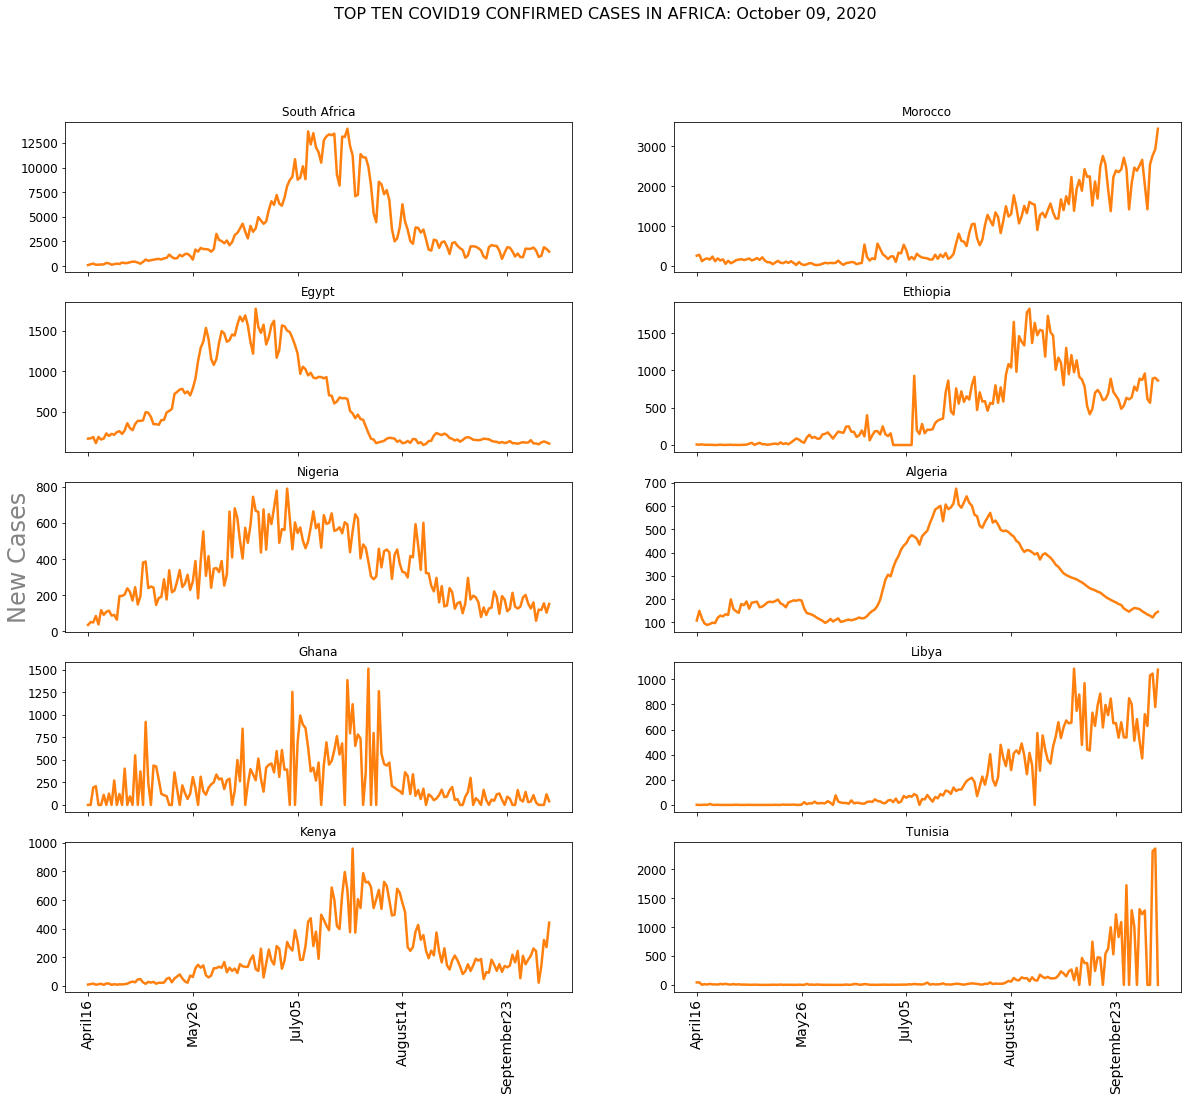

In [108]:
fig = plt.figure(figsize=(20, 16))
plt.suptitle('TOP TEN COVID19 CONFIRMED CASES IN AFRICA: '+ date_string , fontsize=16)
count_total_per_day=[]
axes_y_position ={'y1':1.0}
for count in confirmed_cases_first10:
    afrik_count = countries_new_cases[countries_new_cases['Country_Other'] == count]
    afrik_count =  afrik_count.copy()
    afrik_count.fillna(0, inplace=True)
    
    for date in dates: 
        if afrik_count[date].values[0] == 0:
            total = afrik_count[date].values[0]
            count_total_per_day.append(int(total))
        else: 
            total = afrik_count[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int)
            count_total_per_day.append(int(total))   

    ax = fig.add_subplot(len(confirmed_cases_first10)/2,2,confirmed_cases_first10.index(count) + 1)
    ax.plot(dates, count_total_per_day, color='#FF800E', linewidth=2.5)
    ax.set_title(count)
    if confirmed_cases_first10.index(count)== 4:
        ax.set_ylabel('New Cases', fontsize=24, color='#848484')

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=12)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    if ax.get_position().y1 < axes_y_position['y1']:
        axes_y_position['y1'] = ax.get_position().y1
    
    count_total_per_day=[] 
for a in fig.get_axes():
    if a.get_position().y1 != axes_y_position['y1']:
        tick_labels = ['']*len(a.get_xticklabels())
        a.set_xticklabels(tick_labels)

[Return to top](#top)